uint8
uint16


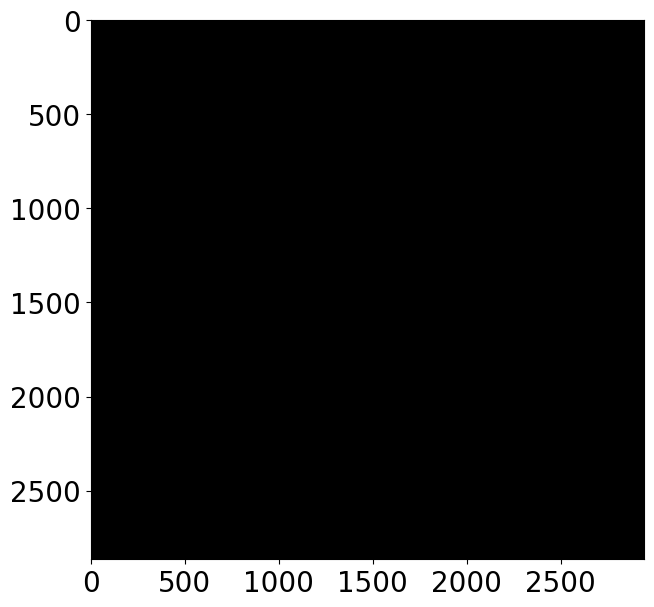

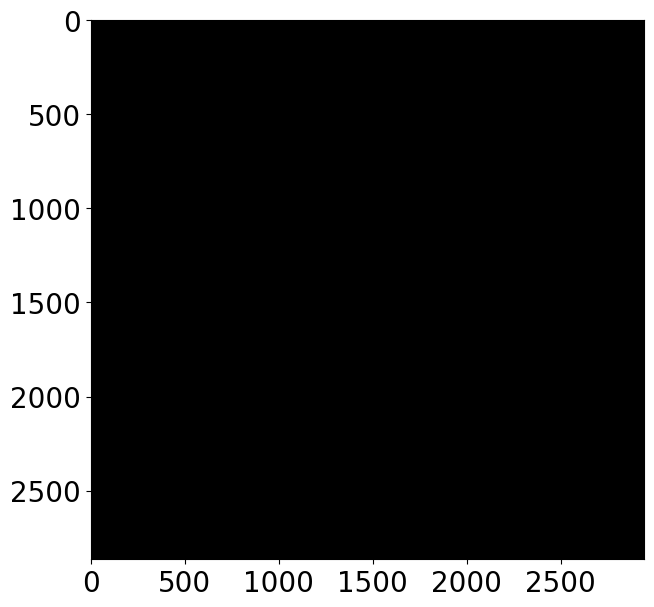

In [5]:
from PIL import Image
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
#from libtiff import TIFF
from skimage import io
#import pytiff
from tifffile import tifffile
#import OpenImageIO as oiio
#import rasterio
#import tensorflow_io as tfio
import cv2
import scipy
import keras
from skimage import color, data, restoration
from scipy.signal import convolve2d
import sporco
import skimage 
from scipy import ndimage
from skimage import measure
import matlab
import matlab.engine 
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl
from wolframclient.language import wl, wlexpr
from wolframclient.evaluation import WolframLanguageSession 
#import htmlPy
import eel
from skimage.metrics import structural_similarity
from skimage.metrics import mean_squared_error
from skimage import filters
from skimage.filters import try_all_threshold
from skimage import morphology
import pandas as pd
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
from skimage.io import imread
from skimage.feature import peak_local_max
from skimage.filters import hessian
from skimage.metrics import peak_signal_noise_ratio
import pandas as pd
from skimage.filters.rank import entropy
from skimage.morphology import disk


from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
#import sunkit_image

import numpy as np

def boxplot_2d(x,y, ax, whis=1.5):
    xlimits = [np.percentile(x, q) for q in (25, 50, 75)]
    ylimits = [np.percentile(y, q) for q in (25, 50, 75)]

    ##the box
    box = Rectangle(
        (xlimits[0],ylimits[0]),
        (xlimits[2]-xlimits[0]),
        (ylimits[2]-ylimits[0]),
        ec = 'k',
        zorder=0
    )
    ax.add_patch(box)

    ##the x median
    vline = Line2D(
        [xlimits[1],xlimits[1]],[ylimits[0],ylimits[2]],
        color='k',
        zorder=1
    )
    ax.add_line(vline)

    ##the y median
    hline = Line2D(
        [xlimits[0],xlimits[2]],[ylimits[1],ylimits[1]],
        color='k',
        zorder=1
    )
    ax.add_line(hline)

    ##the central point
    ax.plot([xlimits[1]],[ylimits[1]], color='k', marker='o')

    ##the x-whisker
    ##defined as in matplotlib boxplot:
    ##As a float, determines the reach of the whiskers to the beyond the
    ##first and third quartiles. In other words, where IQR is the
    ##interquartile range (Q3-Q1), the upper whisker will extend to
    ##last datum less than Q3 + whis*IQR). Similarly, the lower whisker
    ####will extend to the first datum greater than Q1 - whis*IQR. Beyond
    ##the whiskers, data are considered outliers and are plotted as
    ##individual points. Set this to an unreasonably high value to force
    ##the whiskers to show the min and max values. Alternatively, set this
    ##to an ascending sequence of percentile (e.g., [5, 95]) to set the
    ##whiskers at specific percentiles of the data. Finally, whis can
    ##be the string 'range' to force the whiskers to the min and max of
    ##the data.
    iqr = xlimits[2]-xlimits[0]

    ##left
    left = np.min(x[x > xlimits[0]-whis*iqr])
    whisker_line = Line2D(
        [left, xlimits[0]], [ylimits[1],ylimits[1]],
        color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [left, left], [ylimits[0],ylimits[2]],
        color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##right
    right = np.max(x[x < xlimits[2]+whis*iqr])
    whisker_line = Line2D(
        [right, xlimits[2]], [ylimits[1],ylimits[1]],
        color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [right, right], [ylimits[0],ylimits[2]],
        color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##the y-whisker
    iqr = ylimits[2]-ylimits[0]

    ##bottom
    bottom = np.min(y[y > ylimits[0]-whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [bottom, ylimits[0]], 
        color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [xlimits[0],xlimits[2]], [bottom, bottom], 
        color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##top
    top = np.max(y[y < ylimits[2]+whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [top, ylimits[2]], 
        color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [xlimits[0],xlimits[2]], [top, top], 
        color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##outliers
    mask = (x<left)|(x>right)|(y<bottom)|(y>top)
    ax.scatter(
        x[mask],y[mask],
        facecolors='none', edgecolors='k'
    )

    
def readimage(path):
    'path to file'
    'чтение файла возвращает изображение'
    
    image = cv2.imread(path,0)
    #print(image.shape)
    print(image.dtype)
    return image

def tiffreader(path):
    image=cv2.imread(path,-1)
    #print(image.shape)
    print(image.dtype)
    return image

from skimage.feature import hessian_matrix, hessian_matrix_eigvals
def detect_ridges(gray, sigma=1.0):
    #hxx, hyy, hxy = hessian_matrix(gray, sigma)
    H_elems = hessian_matrix(gray, sigma)
    #i1, i2 = hessian_matrix_eigvals(hxx, hxy, hyy)
    i1=hessian_matrix_eigvals(H_elems)[0]
    i2=hessian_matrix_eigvals(H_elems)[1]
    return i1, i2

def ridgedetect(image):
    imagemax,imagemin=detect_ridges(image, sigma=0.1)
    plt.figure(figsize=(15, 7))
    plt.imshow(imagemax, cmap=plt.cm.gray,vmax=image.max(),vmin=image.min())
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    plt.figure(figsize=(15, 7))
    plt.imshow(imagemin, cmap=plt.cm.gray,vmax=image.max(),vmin=image.min())
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    try:
       ridge_filter = cv2.ximgproc.RidgeDetectionFilter_create()
       ridges = ridge_filter.getRidgeFilteredImage(image)
       plt.figure(figsize=(15, 7))
       plt.imshow(ridges[0:1000,0:1000], cmap=plt.cm.gray,vmax=image.max(),vmin=image.min())
       plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    except:
        pass
    
    
def main():
    image=readimage("C:/Users/evgen/Downloads/s_1_1102_c.jpg")
    image=tiffreader("C:/Users/evgen/Downloads/s_1_1102_c.tif")
    ridgedetect(image)
    plt.show()
    
    
if __name__ == "__main__":
    main()